In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Taylor Series

Example: $e^x$ and its Taylor Series expansion to order-2 around $x = 0$.

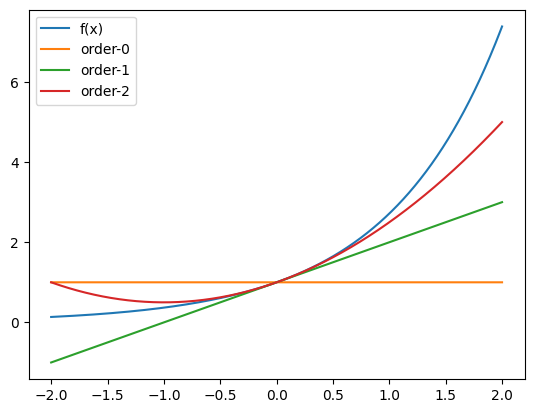

In [ ]:
x = np.arange(-2, 2, 0.001)
plt.plot(x, np.exp(x), label = 'f(x)')
plt.plot(x, np.repeat(1, len(x)), label = 'order-0')
plt.plot(x, 1 + x, label = 'order-1')
plt.plot(x, 1 + x + 1/2 * x**2, label = 'order-2')
plt.legend()

Example: $\log(1+x)$ and its Taylor Series expansion to order-3 around $x = 0$.

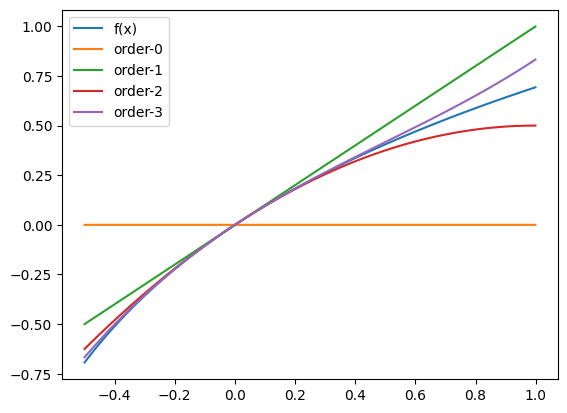

In [ ]:
x = np.arange(-0.5, 1, 0.001)
plt.plot(x, np.log(1+x), label = 'f(x)')
plt.plot(x, np.repeat(0, len(x)), label = 'order-0')
plt.plot(x, x, label = 'order-1')
plt.plot(x, x - 1/2 * x**2, label = 'order-2')
plt.plot(x, x - 1/2 * x**2 + 1/3 * x**3, label = 'order-3')
plt.legend()

### Brownian Motion Properties

A smooth function has finite variation while a Brownian Motion has infinite variation.

In [1]:
# Define a smooth function
def f(x):
  return np.exp(x) * np.sin(3*x)

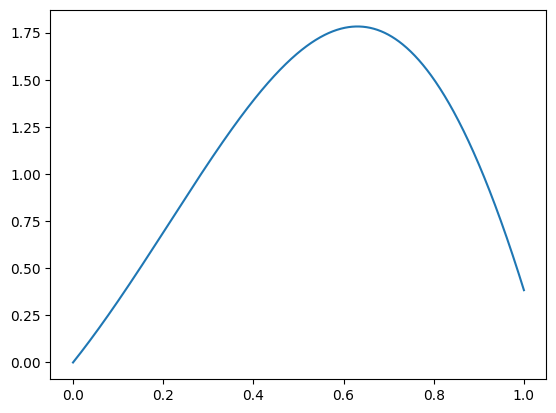

In [4]:
t = np.arange(0, 1.001, 0.001)
plt.plot(t, f(t))

Note: Below, in the *plt.scatter* step, you can also call the function in terms of $n$, the number of time intervals, setting $dt = \frac{1}{n}$ and letting $n$ vary from 1 to 10000 (for example).

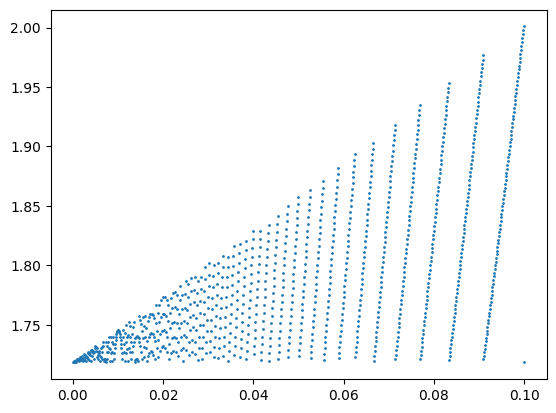

In [ ]:
def variation(dt):
  t = np.arange(0, 1+dt, dt)
  return np.abs(np.diff(f(t))).sum()
plt.scatter(np.arange(0.1, 0, -0.0001), [variation(dt) for dt in np.arange(0.1, 0, -0.0001)], s = 1)

This definition of Brownian Motion will be used throughout the rest of the code.

In [6]:
# DEFINE BROWNIAN MOTION
def gen_bm(dt = 0.0001, T = 1):
  t = np.arange(0, T+dt/2, dt)
  w = np.zeros(len(t))
  for i in range(1, len(w)):
    w[i] = w[i-1] + np.random.normal(scale = np.sqrt(dt))
  return (t, w)

In [ ]:
# VARIATION of BM
def bm_variation(dt):
  t, w = gen_bm(dt)
  # plt.plot(t, w)
  return np.abs(np.diff(w)).sum()

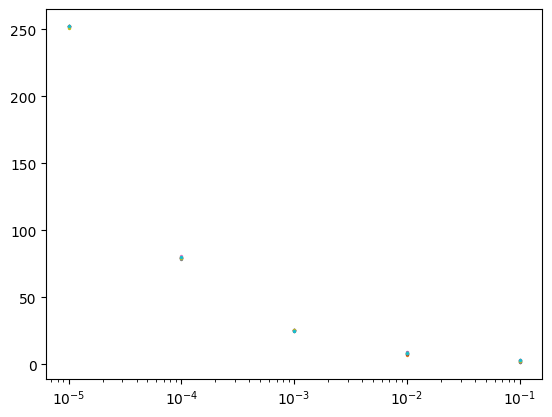

In [ ]:
[[plt.scatter(dt, bm_variation(dt), s = 2) for _ in range(10)] for dt in [0.1, 0.01, 0.001, 0.0001, 0.00001]]
plt.xscale('log')

A smooth function has zero quadratic variation while a Brownian Motion has finite but non-zero quadratic variation.

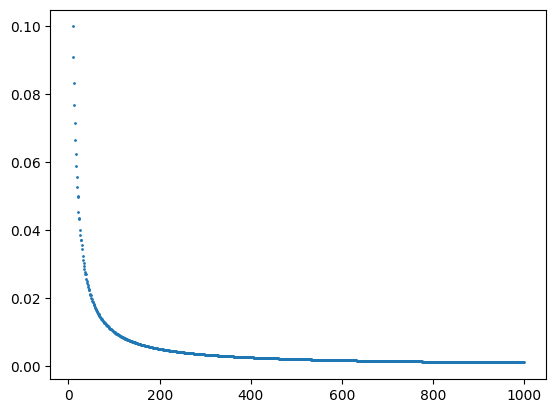

In [ ]:
# QUADRATIC VARIATION
def quadratic_variation(dt):
  t = np.arange(0, 1+dt, dt)
  return np.square(np.diff(f(t))).sum()
plt.scatter(np.arange(10, 1000, 1), [quadratic_variation(1/n) for n in np.arange(10, 1000, 1)], s = 1)

Below, try changing the value of $T$ and see how the quadratic variation changes.

In [ ]:
# QUADRATIC VARIATION of BM
def bm_quadratic_variation(dt):
  t, w = gen_bm(dt = dt, T = 0.5)
  plt.plot(t, w)
  return np.square(np.diff(w)).sum()

0.503733491312176

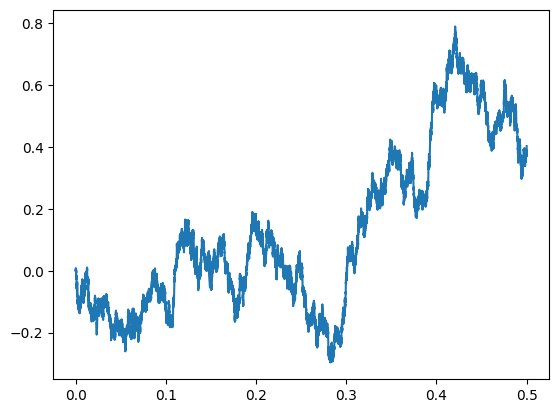

In [ ]:
bm_quadratic_variation(0.00001)

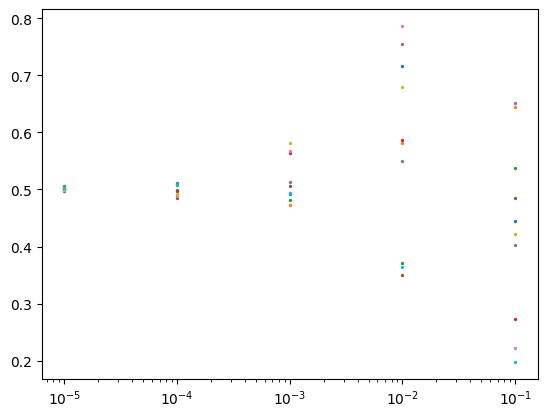

In [ ]:
[[plt.scatter(dt, bm_quadratic_variation(dt), s = 2) for _ in range(10)] for dt in [0.1, 0.01, 0.001, 0.0001, 0.00001]]
plt.xscale('log')

We've already seen that the quadratic variation of Brownian Motion is equal to the amount of time that has elapsed. We express this idea in terms of $dW\cdot dW = dt$. On the other hand, $dt \cdot dt = 0$. For any other products as well, we notice that, for example: $dW \cdot dt = 0$, and so on.

In [ ]:
# dW * dt = ?
def dW_dt(dt):
  t, w = gen_bm(dt = dt)
  return (np.diff(w) * dt).sum()

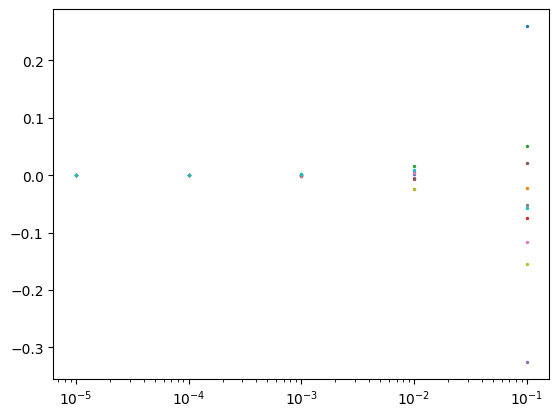

In [ ]:
[[plt.scatter(dt, dW_dt(dt), s = 2) for _ in range(10)] for dt in [0.1, 0.01, 0.001, 0.0001, 0.00001]]
plt.xscale('log')

To generate a Brownian Motion with variance $\sigma^2$, we can multiply a standard Brownian Motion by $\sigma$.

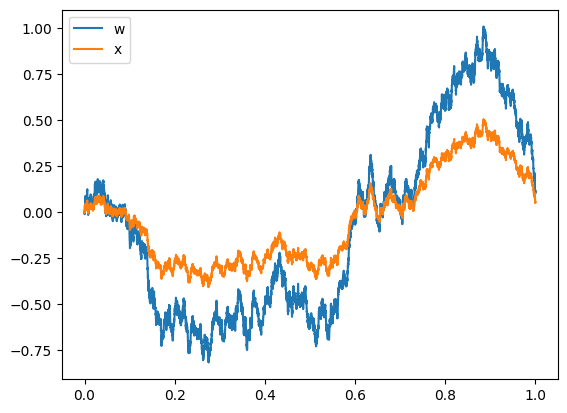

In [7]:
# BM with variance not equal to 1
t, w = gen_bm()
x = 0.5 * w
plt.plot(t, w, label = 'w')
plt.plot(t, x, label = 'x')
plt.legend()

A Brownian Motion with drift is a scaled version of a standard Brownian Motion with a drift component. Here, we're assuming that $\mu$ and $\sigma$ are constant, but that need not be the case in general.

In [ ]:
# BM with drift (Arithmetic BM)
def gen_abm(mu = 0, sigma = 1, dt = 0.0001, T = 1):
  t, w = gen_bm(dt = dt, T = T)
  return (t, mu * t + sigma * w)

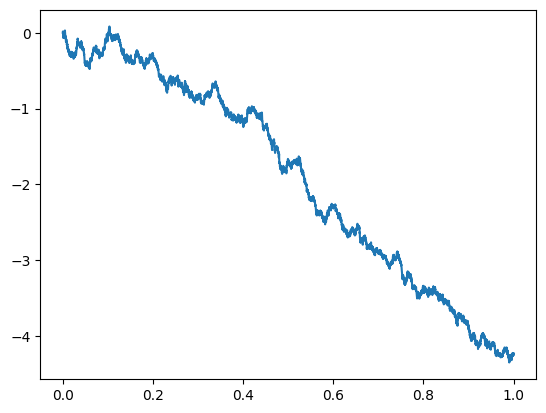

In [ ]:
t, x = gen_abm(mu = -3)
plt.plot(t, x)

GEOMETRIC BROWNIAN MOTION

A Geometric Brownian Motion is very useful in modeling stock prices. Again, we're assuming that $\mu$ and $\sigma$ are constant, but that need not be the case in general.

In [ ]:
def gen_gbm(s0 = 100, T = 1, dt = 0.0001, mu = 1, sigma = 1):
  t, w = gen_bm(dt = dt, T = T)
  s = np.zeros(len(t))
  s[0] = s0
  for i in range(1, len(s)):
    ds = mu * s[i-1] * dt + sigma * s[i-1] * (w[i]-w[i-1])
    s[i] = s[i-1] + ds
  return (t, s)

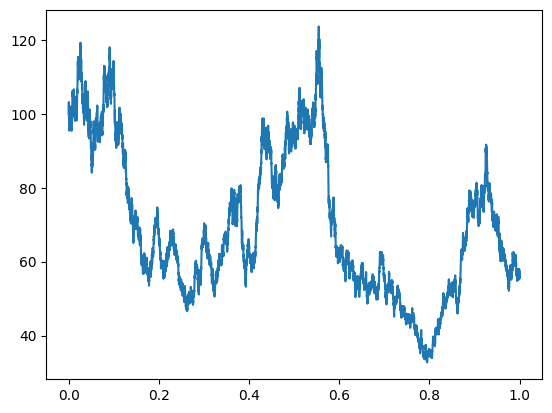

In [ ]:
(t, s) = gen_gbm(s0 = 100)
plt.plot(t, s)

Endpoint Distribution of GBM

In [ ]:
from scipy import stats

Below, we generate a GBM and then store the ending value. We carry this out 10000 times.


In [ ]:
s0 = 100; mu = 1; sigma = 1; T = 1
s_T = np.array([gen_gbm(s0 = s0, mu = mu, sigma = sigma, T = T)[1][-1] for _ in range(1000)])

Here's a plot comparing the histogram of the log of ending GBM values and the pdf of a normal distribution with the properties we derived in class.

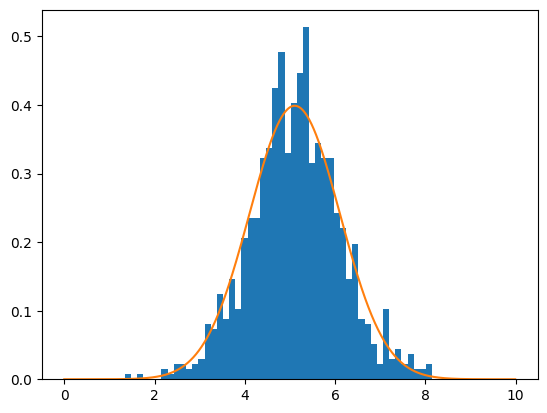

In [ ]:
plt.hist(np.log(s_T), bins = 50, density = True)
plt.plot(np.arange(0, 10, 0.01), stats.norm.pdf(np.arange(0, 10, 0.01), loc = np.log(s0) + (mu-1/2*sigma**2)*T, scale = sigma**2 * T))

And here's a similar plot comparing the histogram of the ending GBM values and the pdf of the corresponding lognormal distribution. Be careful in setting the arguments of *stats.lognorm.pdf* and refer to the documentation for details.

(0.0, 500.0)

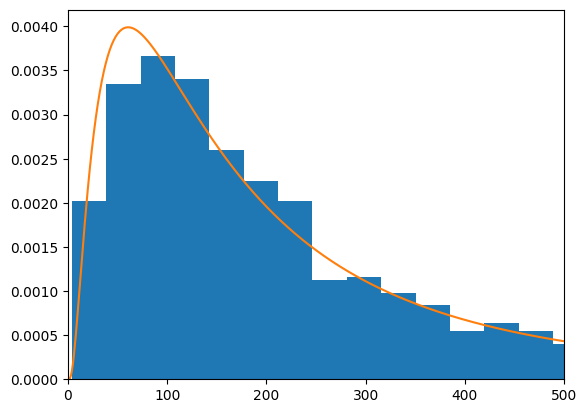

In [ ]:
plt.hist(s_T, bins = 100, density = True)
plt.plot(np.arange(500), stats.lognorm.pdf(np.arange(500), scale = s0*np.exp((mu-1/2*sigma**2)*T), s = sigma*np.sqrt(T)))
plt.xlim((0, 500))

**Generating Correlated Stock Prices**

This algorithm follows the series of steps laid out in class. Refer to the notes for more details.

In [ ]:
rho = 0.9; mu1 = 0.05; sigma1 = 0.20; mu2 = 0.05; sigma2 = 0.30; dt = 1/365
# two independently generated brownian motions
t, w1 = gen_bm(dt = dt, T = 1)
_, w2 = gen_bm(dt = dt, T = 1)
# define dw1 & dw2
dw1 = np.diff(w1); dw2 = np.diff(w2)
# create stock price arrays and initialize
s1 = np.zeros(len(t))
s2 = np.zeros(len(t))
s1[0] = 100; s2[0] = 100
# create two correlated scaled processes
for i in range(1, len(t)):
  dx1 = sigma1 * dw1[i-1]
  dx2 = rho * sigma2 * dw1[i-1] + np.sqrt(1-rho**2) * sigma2 * dw2[i-1]
  ds1 = mu1 * s1[i-1] * dt + s1[i-1] * dx1
  ds2 = mu2 * s2[i-1] * dt + s2[i-1] * dx2
  s1[i] = s1[i-1] + ds1
  s2[i] = s2[i-1] + ds2d


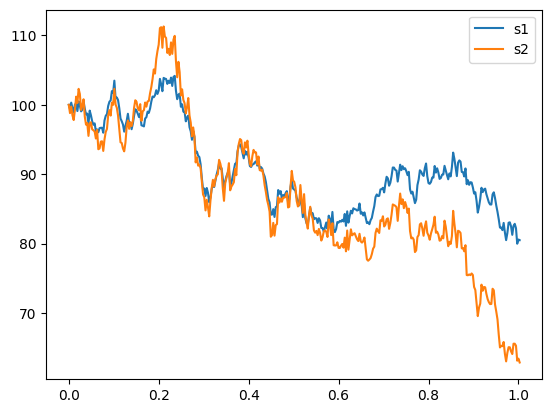

In [ ]:
plt.plot(t, s1, label='s1')
plt.plot(t, s2, label='s2')
plt.legend()

The above procedure is adequate for generating two correlated stock prices. However, it gets tedious when the number of stocks to simulate increases. In preparation for a more "automated" procedure, we first define a function that returns multiple independent Brownian Motions.

In [ ]:
# generate multiple brownian motions
def gen_bm_n(dt = 0.001, T = 1, n = 1):
  t = np.arange(0, T+dt/2, dt)
  w_n = np.zeros((len(t), n))
  for i in range(n):
    _, w = gen_bm(dt = dt, T = T)
    w_n[:, i] = w
  return (t, w_n)

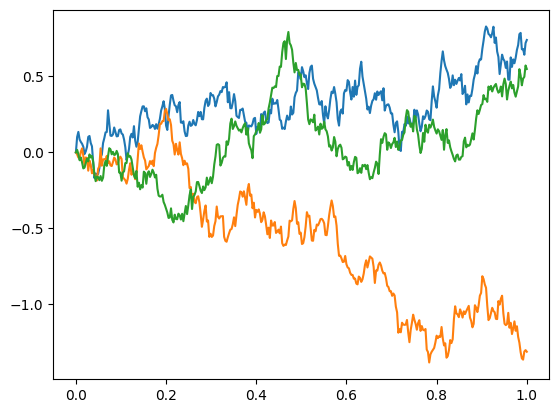

In [ ]:
# example
t, w = gen_bm_n(dt = 1/365, T = 1, n = 3)
plt.plot(t, w)

Now, we develop an algorithm for generating multiple correlated stock prices using Cholesky decomposition.

In [ ]:
# Simulate correlated stock prices with cholesky decomposition
# Start with the covariance matrix
C = np.array([[0.04, 0.03], [0.03, 0.09]]) # estimated from data
mu = np.array([0.05, 0.05]) # estimated from data
dt = 1/365
L = np.linalg.cholesky(C) # 2 x 2 array
# two independently generated brownian motions
t, w = gen_bm_n(dt = dt, T = 1, n = C.shape[0]) # w is 366 x 2 array
# define dw
dw = np.diff(w, axis = 0) # 365 x 2 array
# define stock price array
s = np.zeros(w.shape) # 366 x 2 array
s[0, :] = [100, 100] # from data
dx = L.dot(dw.transpose()).transpose() # 365 x 2 array
for i in range(1, len(t)):
  ds = (mu * dt + dx[i-1,:]) * s[i-1,:]
  s[i,:] = s[i-1,:] + ds

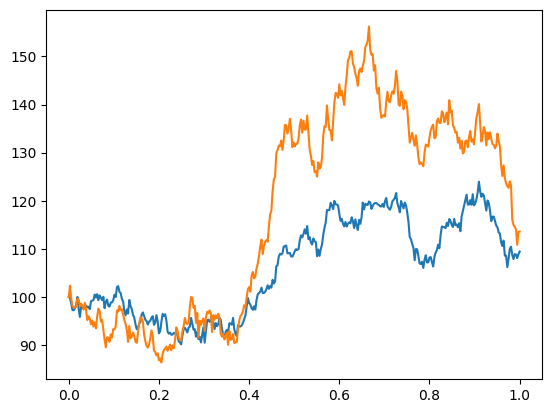

In [ ]:
plt.plot(t, s)

**Binomial Model**

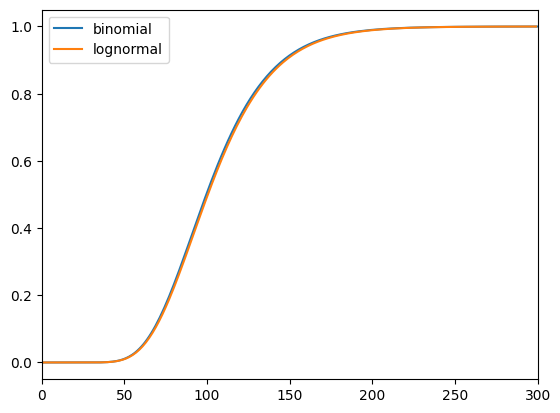

In [ ]:
mu = 0.05; sigma = 0.30; T = 1; n = 1000; dt = T / n
u = np.exp(mu*dt) * (1 + np.sqrt(np.exp(sigma**2 * dt) - 1))
d = np.exp(mu*dt) * (1 - np.sqrt(np.exp(sigma**2 * dt) - 1))
p = 1/2
S_0 = 100
S_T = np.zeros(n+1)
prob = np.zeros(n+1)
for i in range(n+1):
  S_T[i] = S_0 * (u**i) * (d**(n-i))
  prob[i] = stats.binom.pmf(i, n, p)
# plt.bar(S_T, prob)
plt.plot(S_T, prob.cumsum(), label = 'binomial')
plt.plot(np.arange(0, 300), stats.lognorm.cdf(np.arange(0, 300), scale = S_0*np.exp((mu-1/2*sigma**2)*T), s = sigma*np.sqrt(T)), label='lognormal')
plt.xlim((0, 300))
plt.legend()